In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import rc, colors
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mflex.simulate.simulate_boundary import dalmatian
from mhsflex.field2d import Field2dData
from mhsflex.field3d import Field3dData, calculate_magfield, j3d, lf3d

from mhsflex.switch import f, f_low

from mhsflex.poloidal import phi, phi_hypgeo, phi_low, dphidz, dphidz_hypgeo, dphidz_low

rc("font", **{"family": "serif", "serif": ["Times"]})
rc("text", usetex=True)

c4 = (1.000, 0.224, 0.376)
c1 = (0.439, 0.788, 1.000)
c3 = "black"
c2 = (0.420, 0.502, 1.000)

cmap = colors.LinearSegmentedColormap.from_list(
    "cmap",
    (
        (0.000, (0.000, 0.000, 0.000)),
        (0.500, (0.659, 0.659, 0.659)),
        (1.000, (1.000, 1.000, 1.000)),
    ),
)

cmap2 = colors.LinearSegmentedColormap.from_list(
    "cmap2", ((0.000, (0.984, 1.000, 0.000)), (1.000, (1.000, 0.988, 0.761)))
)

c1 = (0.439, 0.788, 1.000)
c2 = (0.420, 0.502, 1.000)
c3 = "black"
c4 = (1.000, 0.224, 0.376)
c5 = (0.784, 0.231, 0.576)
c7 = (0.992, 0.251, 0.733)
c8 = (0.867, 0.871, 0.184)
c9 = (0.949, 0.922, 0.678)
c10 = (0.984, 0.455, 0.231)
c11 = (0.765, 0.835, 0.922)
c12 = (0.965, 0.694, 0.486)
c13 = (0.992, 0.584, 0.820)

/Users/lilli/Library/Caches/pypoetry/virtualenvs/mflex-cNoQEf_u-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
nresol_x = 200
nresol_y = 200
nresol_z = 400
xmin = 0.0
xmax = 20.0  # Mm
ymin = 0.0
ymax = 20.0
zmin = 0.0
zmax = 20.0
pixelsize_x = (xmax - xmin) / nresol_x
pixelsize_y = (ymax - ymin) / nresol_y
pixelsize_z = (zmax - zmin) / nresol_z

z0 = 2.0
deltaz = 0.2

z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
B_PHOTO = 500
data_bz = np.zeros((nresol_y, nresol_x))

a = 0.22
alpha = 0.3
a_low = a * (1 - np.tanh(-z0 / deltaz))
kappa = -np.log(a / a_low) / z0
kappa = 1 / z0


# Figure 1
z_arr: np.ndarray[np.float64, np.dtype[np.float64]] = (
    np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
)

f_const = np.zeros(nresol_z)
f_exp = np.zeros(nresol_z)
f_tanh = np.zeros(nresol_z)

for iz in range(0, nresol_z):
    z = z_arr[iz]
    f_const[iz] = a * (1 - np.tanh(-z0 / deltaz_b))
    f_exp[iz] = f_low(z, a_low, kappa)
    f_tanh[iz] = f(z, z0, deltaz, a, b)

NameError: name 'deltaz_b' is not defined

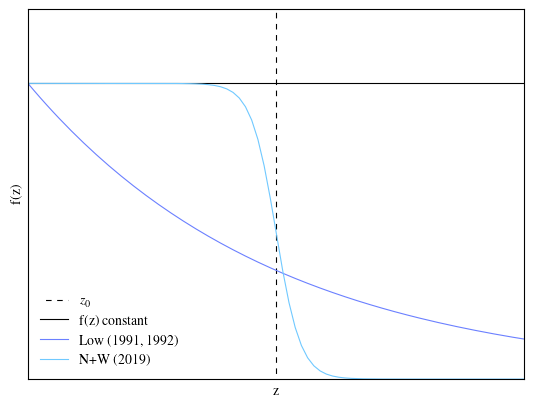

In [78]:
plt.axvline(x=z0, color="black", linestyle=(5,(5,5)), linewidth=0.8, label=r"$z_0$")
plt.plot(
    z_arr,
    f_const,
    linewidth=0.8,
    color=c3,
    # linestyle="dotted",
    label=r"f(z) constant",
)

plt.plot(
    z_arr,
    f_exp,
    linewidth=0.8,
    color=c2,
    # linestyle="dashed",
    label=r"Low (1991, 1992)",
)
plt.plot(
    z_arr,
    f_tanh,
    linewidth=0.8,
    color=c1,
    # linestyle="solid",
    label=r"N+W (2019)",
)


plt.legend(frameon=False)
plt.xlabel(r"z")
plt.ylabel(r"f(z)")
plt.xticks([])
plt.yticks([])
plt.xlim([0, 2 * z0])
plt.ylim([0, 2.5 * a])
# plotname = "/Users/lilli/Desktop/Thesis_vonNeu/heightprofiles.png"
# plt.savefig(plotname, dpi=300)
plt.tick_params(direction="in", length=2, width=0.5)
plotname = "/Users/lilli/Desktop/PaperA1/heightprofiles.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight")
plt.show()

In [80]:
# Magnitc field parameters
z0_b = z0
deltaz_b = deltaz
a_low = a * (1 - np.tanh(-z0_b / deltaz_b))
kappa = -np.log(a / a_low) / z0_b
kappa = 1 / z0_b

a = 0.48
alpha = 0.03

length_scale = 1.0
length_scale_x = 1.0 * nresol_x * float(pixelsize_x)
length_scale_y = 1.0 * nresol_y * float(pixelsize_y)
length_scale_x_norm = length_scale_x / length_scale
length_scale_y_norm = length_scale_y / length_scale

x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin

kx_arr = np.arange(nf_max) * np.pi / length_scale_x_norm  # [0:nf_max]
ky_arr = np.arange(nf_max) * np.pi / length_scale_y_norm  # [0:nf_max]

one_arr = 0.0 * np.arange(nf_max) + 1.0
ky_grid = np.outer(ky_arr, one_arr)  # [0:nf_max, 0:nf_max]
kx_grid = np.outer(one_arr, kx_arr)  # [0:nf_max, 0:nf_max]
k2_arr = np.outer(ky_arr**2, one_arr) + np.outer(one_arr, kx_arr**2)
k2_arr[0, 0] = (np.pi / length_scale) ** 2

ratiodzls = deltaz_b / length_scale
p_arr = 0.5 * ratiodzls * np.sqrt(k2_arr * (1.0 - a - a * b) - alpha**2)
q_arr = 0.5 * ratiodzls * np.sqrt(k2_arr * (1.0 - a + a * b) - alpha**2)

print(p_arr[20, 20])
print(q_arr[20, 20])

p_arr_low = 2.0 / kappa * np.sqrt(k2_arr - alpha**2)
q_arr_low = 2.0 / kappa * np.sqrt(k2_arr * a_low)

print(p_arr_low[20, 20])
print(q_arr_low[20, 20])

x_plot = np.outer(y_arr, np.ones(nresol_x))
y_plot = np.outer(x_arr, np.ones(nresol_y)).T

0.08880700153068728
0.4442781651418255
17.771126605673018
17.412473878703597


In [81]:
phi_hyper = np.zeros((nresol_y, nresol_x, nresol_z))
phi_asymp = np.zeros((nresol_y, nresol_x, nresol_z))
phi_exp = np.zeros((nresol_y, nresol_x, nresol_z))

dphidz_exp = np.zeros((nresol_y, nresol_x, nresol_z))
dphidz_hyper = np.zeros((nresol_y, nresol_x, nresol_z))
dphidz_asymp = np.zeros((nresol_y, nresol_x, nresol_z))

# for ix in range(nresol_x):
#     for iy in range(nresol_y):
p = p_arr[20, 20]
q = q_arr[20, 20]
p_low = p_arr_low[20, 20]
q_low = q_arr_low[20, 20]
for iz in range(nresol_z):
    z = z_arr[iz]
    phi_hyper[20, 20, iz] = phi_hypgeo(z, p, q, z0_b, deltaz_b)
    phi_asymp[20, 20, iz] = phi(z, p, q, z0_b, deltaz_b)
    phi_exp[20, 20, iz] = phi_low(z, p_low, q_low, kappa)

    dphidz_hyper[20, 20, iz] = dphidz_hypgeo(z, p, q, z0_b, deltaz_b)
    dphidz_asymp[20, 20, iz] = dphidz(z, p, q, z0_b, deltaz_b)
    dphidz_exp[20, 20, iz] = dphidz_low(z, p_low, q_low, kappa)

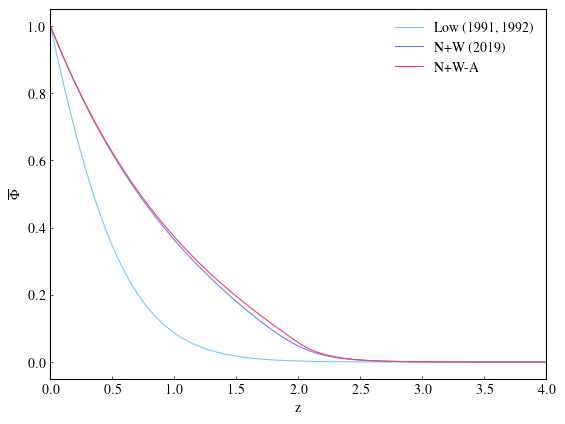

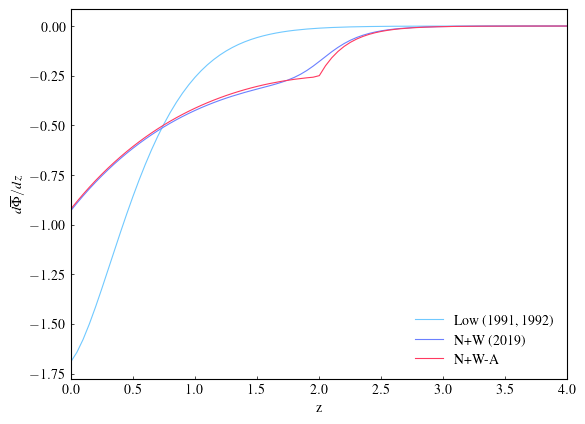

In [83]:
# plt.plot(z_arr, phi_hyper[0, 0, :], linewidth=0.3, color=c2, label=r"N+W (2019)")
plt.plot(
    z_arr,
    phi_exp[20, 20, :],
    linewidth=0.8,
    color=c1,
    label=r"Low (1991, 1992)",
)
plt.plot(
    z_arr,
    phi_hyper[20, 20, :],
    linewidth=0.8,
    color=c2,
    label=r"N+W (2019)",
)
plt.plot(
    z_arr,
    phi_asymp[20, 20, :],
    linewidth=0.8,
    color=c4,
    label="N+W-A",
    )

# for ix in range(4, 80, 4):
#     plt.plot(
#         z_arr,
#         phi_hyper[ix, ix, :],
#         linewidth=0.3,
#         color=c2,
#         # label="N+W (2019)"
#     )
#     plt.plot(
#         z_arr,
#         phi_asymp[ix, ix, :],
#         linewidth=0.3,
#         color=c4,
#         # label="N+N (2024)",
#     )
#     # plt.plot(
#     #     z_arr,
#     #     phi_exp[ix, ix, :],
#     #     linewidth=0.3,
#     #     color=c1,
#     #     # label="Low (1991, 1992)",
#     # )
plt.xlim([0, 2 * z0])
plt.legend(frameon=False)
plt.xlabel(r"z")
plt.ylabel(r"$\overline{\Phi}$")
plt.tick_params(direction="in", length=2, width=0.5)
# plt.text(0.02, 0.98, "(a)", fontsize=14)
plotname = "/Users/lilli/Desktop/PaperA1/phi.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight")
plt.show()

plt.plot(
    z_arr,
    dphidz_exp[20, 20, :],
    linewidth=0.8,
    color=c1,
    label=r"Low (1991, 1992)",
)
plt.plot(
    z_arr,
    dphidz_hyper[20, 20, :],
    linewidth=0.8,
    color=c2,
    label=r"N+W (2019)",
)
plt.plot(
    z_arr,
    dphidz_asymp[20, 20, :],
    linewidth=0.8,
    color=c4,
    label=r"N+W-A",
)

# for ix in range(18, 80, 8):
#     plt.plot(
#         z_arr,
#         dphidz_hyper[ix, ix, :],
#         linewidth=0.5,
#         color=c2,
#         # label="N+W (2019)",
#     )
#     plt.plot(
#         z_arr,
#         dphidz_asymp[ix, ix, :],
#         linewidth=0.5,
#         color=c4,
#         # label="N+N (2024)",
#     )
    # plt.plot(
    #     z_arr,
    #     dphidz_exp[ix, ix, :],
    #     linewidth=0.3,
    #     color=c1,
    #     # label="Low (1991, 1992)",
    # )
plt.xlim([0, 2 * z0])
#plt.ylim([-15, 1.0])
plt.legend(frameon=False)
plt.xlabel(r"z")
plt.ylabel(r"$d \overline{\Phi} / dz$")
plt.tick_params(direction="in", length=2, width=0.5)
# plt.text(0.02, 0.0, "(b)", fontsize=14)
plotname = "/Users/lilli/Desktop/PaperA1/dphidz.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight")
plt.show()

In [4]:
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
B_PHOTO = 500
data_bz = np.zeros((nresol_y, nresol_x))

for ix in range(0, nresol_x):
    for iy in range(0, nresol_y):
        x = x_arr[ix] / 10.0
        y = y_arr[iy] / 10.0
        data_bz[iy, ix] = dalmatian(x, y)

data2d = Field2dData(
    nresol_x,
    nresol_y,
    nresol_z,
    nresol_x,
    pixelsize_x,
    pixelsize_y,
    pixelsize_z,
    x_arr,
    y_arr,
    z_arr,
    data_bz,
)

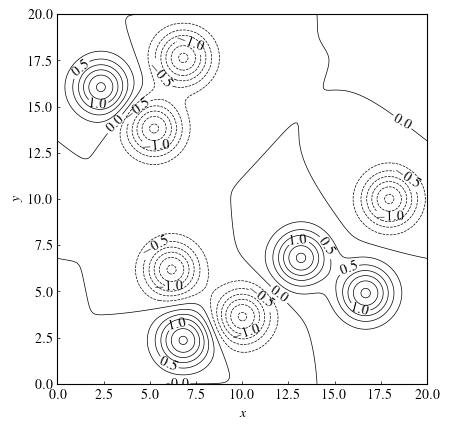

In [86]:
x_plot = np.outer(y_arr, np.ones(nresol_x))
y_plot = np.outer(x_arr, np.ones(nresol_y)).T

# fig = plt.figure()
# ax = fig.add_subplot(111)
# CS = ax.contour(y_plot, x_plot, data_bz, 12, cmap=cmap, linewidths=0.8)
# ax.set_xlabel("x")
# ax.set_ylabel("y")
# ax.clabel(CS, fontsize=6, inline=True)
# ax.set_box_aspect(1)

# ax.grid(False)

# ax.set_xlabel(r"$x$")
# ax.set_ylabel(r"$y$")

# plt.tick_params(direction="in", length=2, width=0.5)

# ax.set_xlim(ymin, ymax)
# ax.set_ylim(xmin, xmax)
# plt.text(0.02, 1.9, "(a)", fontsize=14)
# plotname = "/Users/lilli/Desktop/PaperA1/contour1.png"
# plt.savefig(plotname, dpi=600, bbox_inches="tight")
# plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
CS = ax.contour(y_plot, x_plot, data_bz, levels=(-1.5, -1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.25, 1.5), colors="k", linewidths=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.clabel(CS, fontsize=10, levels=(-1.0, -0.5, 0.0, 0.5, 1.0), inline=True)
ax.set_box_aspect(1)
ax.grid(False)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")

plt.tick_params(direction="in", length=2, width=0.5)
# plt.text(0.02, 1.9, "(a)", fontsize=14)
plotname = "/Users/lilli/Desktop/PaperA1/contour.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight")
plt.show()

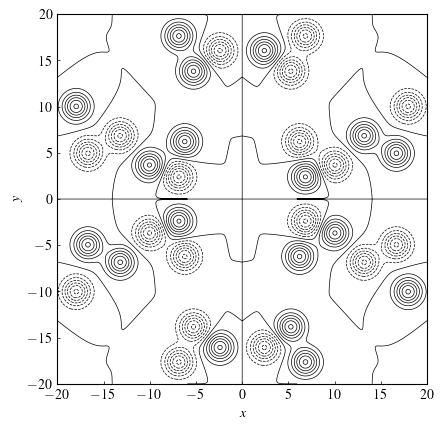

In [87]:
from mflex.model.field.utility.seehafer import mirror_magnetogram

x_arr = np.arange(2.0 * nresol_x) * 2.0 * xmax / (2.0 * nresol_x - 1) - xmax
y_arr = np.arange(2.0 * nresol_y) * 2.0 * ymax / (2.0 * nresol_y - 1) - ymax
x_plot = np.outer(y_arr, np.ones(int(nresol_x * 2.0)))
y_plot = np.outer(x_arr, np.ones(int(nresol_y * 2.0))).T

data_bz_seehafer = mirror_magnetogram(
    data_bz, xmin, xmax, ymin, ymax, nresol_x, nresol_y
)

# fig = plt.figure()
# ax = fig.add_subplot(111)
# CS = ax.contour(y_plot, x_plot, data_bz_seehafer, 12, cmap=cmap, linewidths=0.8)
# ax.set_xlabel("x")
# ax.set_ylabel("y")
# ax.clabel(CS, fontsize=4, inline=True)
# ax.set_box_aspect(1)

# ax.grid(False)

# ax.set_xlabel(r"$x$")
# ax.set_ylabel(r"$y$")

# plt.tick_params(direction="in", length=2, width=0.5)
# plt.text(-1.95, 1.8, "(b)", fontsize=14)
# plotname = "/Users/lilli/Desktop/Paper/contour2.png"
# plt.savefig(plotname, dpi=600, bbox_inches="tight")
# plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
CS = ax.contour(y_plot, x_plot, data_bz_seehafer, levels=(-1.5, -1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.25, 1.5), colors="k", linewidths=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.clabel(CS, fontsize=10, levels=(-1.0, -0.5, 0.0, 0.5, 1.0), inline=True)
ax.set_box_aspect(1)
ax.grid(False)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")

plt.tick_params(direction="in", length=2, width=0.5)
# plt.text(0.02, 1.9, "(a)", fontsize=14)
plotname = "/Users/lilli/Desktop/PaperA1/contour_see.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight")
plt.show()

In [5]:
a_lff = 0.0
alpha_lff = 0.05

a_mhs2 = 0.44
alpha_mhs2 = 0.05

a_mhs1 = 0.22
alpha_mhs1 = 0.05

In [89]:
data3d_lff = calculate_magfield(data2d, a_lff, b, alpha_lff, z0, deltaz)

In [90]:
data3d_lff_2F1 = calculate_magfield(data2d, a_lff, b, alpha_lff, z0, deltaz, asymptotic=False)

In [91]:
data3d_mhs1 = calculate_magfield(data2d, a_mhs1, b, alpha_mhs1, z0, deltaz)

In [92]:
data3d_mhs1_2F1 = calculate_magfield(data2d, a_mhs1, b, alpha_mhs1, z0, deltaz, asymptotic=False)

In [93]:
data3d_mhs2 = calculate_magfield(data2d, a_mhs2, b, alpha_mhs2, z0, deltaz)

In [94]:
data3d_mhs2_2F1 = calculate_magfield(data2d, a_mhs2, b, alpha_mhs2, z0, deltaz, asymptotic=False)

In [95]:
from mhsflex.vis import plot

folder = "/Users/lilli/Desktop/PaperA1"
folder2 = "/Users/lilli/Desktop/PaperA1/2F1"

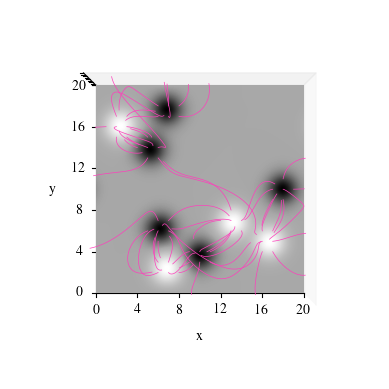

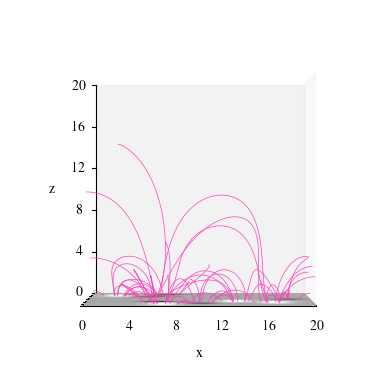

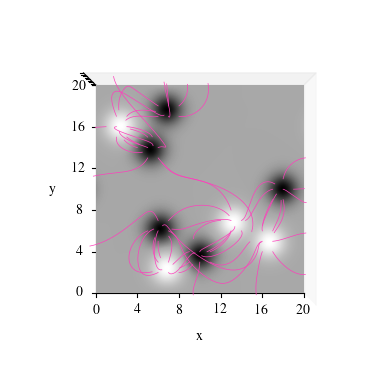

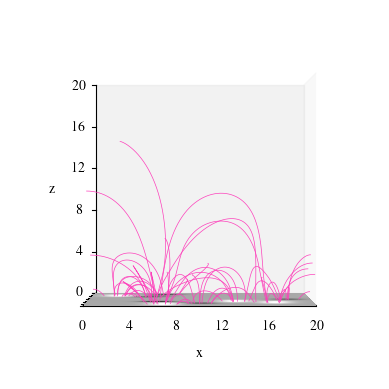

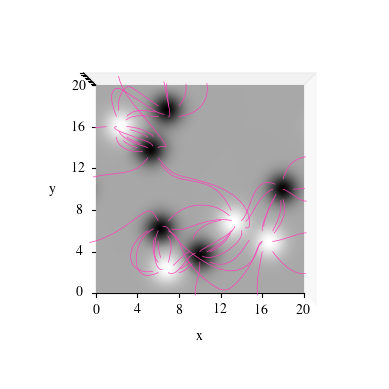

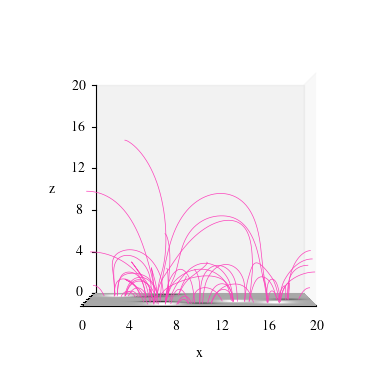

In [97]:
plot(data3d_lff, "los", False, True, path=folder)
plot(data3d_lff, "side", False, True, path=folder)

plot(data3d_mhs1, "los", False, True, path=folder)
plot(data3d_mhs1, "side", False, True, path=folder)

plot(data3d_mhs2, "los", False, True, path=folder)
plot(data3d_mhs2, "side", False, True, path=folder)

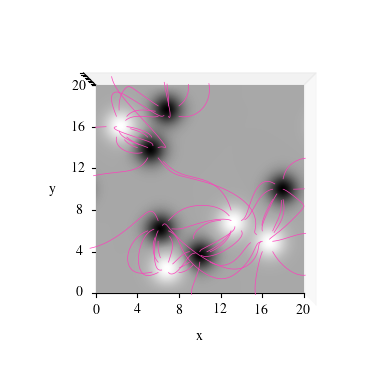

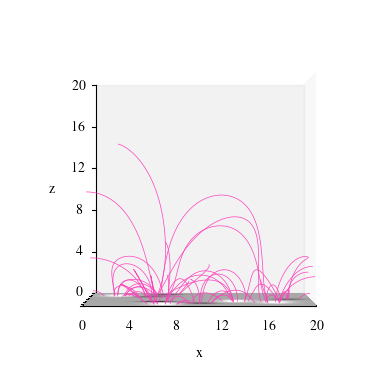

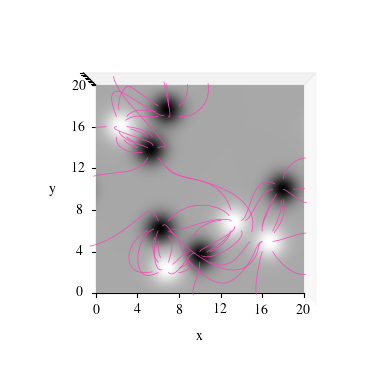

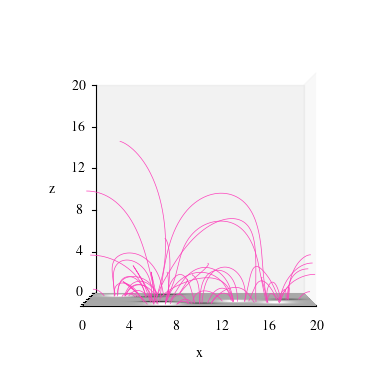

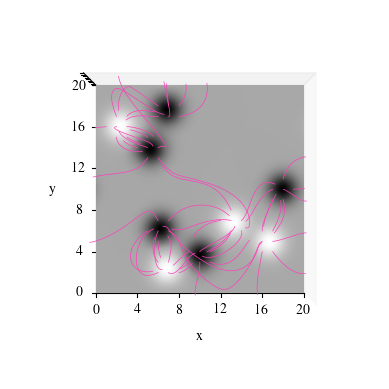

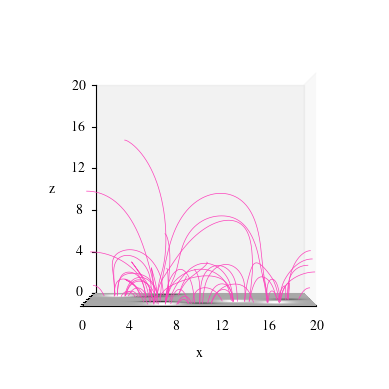

In [98]:
plot(data3d_lff_2F1, "los", False, True, path=folder2)
plot(data3d_lff_2F1, "side", False, True, path=folder2)

plot(data3d_mhs1_2F1, "los", False, True, path=folder2)
plot(data3d_mhs1_2F1, "side", False, True, path=folder2)

plot(data3d_mhs2_2F1, "los", False, True, path=folder2)
plot(data3d_mhs2_2F1, "side", False, True, path=folder2)

In [99]:
print(np.unravel_index(data_bz.argmax(), data_bz.shape))
ix_max = np.unravel_index(data_bz.argmax(), data_bz.shape)[1]
iy_max = np.unravel_index(data_bz.argmax(), data_bz.shape)[0]

(49, 166)


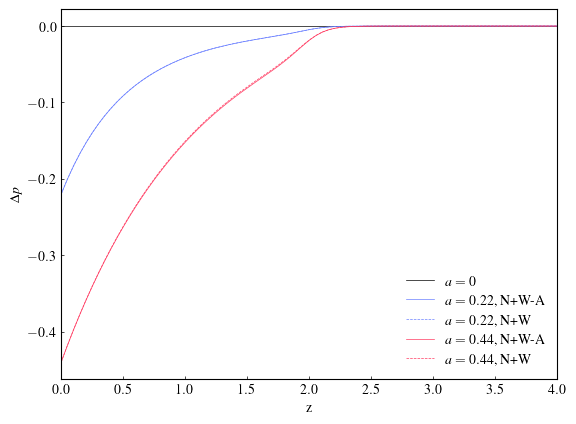

In [107]:
fig, ax1 = plt.subplots()

ax1.plot(
    data3d_mhs1.z,
    data3d_lff.dpressure[iy_max, ix_max, :],
    linewidth=0.5,
    color=c3,
    label=r"$a=0$",
)
ax1.plot(
    data3d_mhs1.z,
    data3d_mhs1.dpressure[iy_max, ix_max, :],
    linewidth=0.5,
    color=c2,
    label=r"$a = 0.22$, N+W-A",
)
ax1.plot(
    data3d_mhs1.z,
    data3d_mhs1_2F1.dpressure[iy_max, ix_max, :],
    linewidth=0.5,
    color=c2,
    linestyle="dashed",
    label=r"$a = 0.22$, N+W",
)
ax1.plot(
    data3d_mhs1.z,
    data3d_mhs2.dpressure[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color=c4,
    label=r"$a = 0.44$, N+W-A",
)
ax1.plot(
    data3d_mhs1.z,
    data3d_mhs2_2F1.dpressure[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="dashed",
    color=c4,
    label=r"$a = 0.44$, N+W",
)


ax1.set_xlabel("z")
plt.xlim([0, 2 * z0])
plt.legend(frameon=False)
ax1.tick_params(direction="in", length=2, width=0.5)

lines1, labels1 = ax1.get_legend_handles_labels()

lines = lines1
labels = labels1
ax1.set_ylabel(r"$\Delta p$")

plt.legend(lines, labels, frameon=False)
plotname = folder  + "/dpressure.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

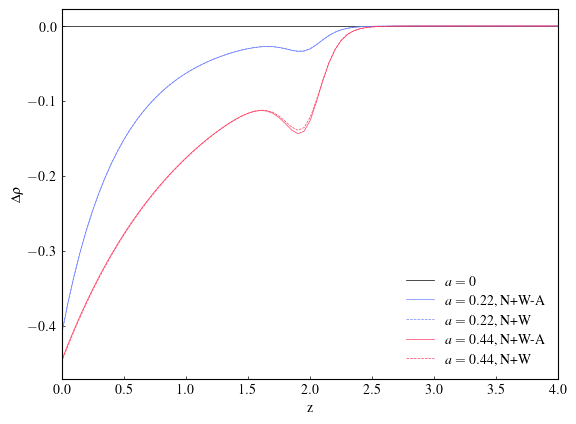

In [108]:
fig, ax1 = plt.subplots()

ax1.plot(
    data3d_mhs1.z,
    data3d_lff.ddensity[iy_max, ix_max, :],
    linewidth=0.5,
    color=c3,
    label=r"$a=0$",
)
ax1.plot(
    data3d_mhs1.z,
    data3d_mhs1.ddensity[iy_max, ix_max, :],
    linewidth=0.5,
    color=c2,
    label=r"$a = 0.22$, N+W-A",
)
ax1.plot(
    data3d_mhs1.z,
    data3d_mhs1_2F1.ddensity[iy_max, ix_max, :],
    linewidth=0.5,
    color=c2,
    linestyle="dashed",
    label=r"$a = 0.22$, N+W",
)
ax1.plot(
    data3d_mhs1.z,
    data3d_mhs2.ddensity[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="solid",
    color=c4,
    label=r"$a = 0.44$, N+W-A",
)
ax1.plot(
    data3d_mhs1.z,
    data3d_mhs2_2F1.ddensity[iy_max, ix_max, :],
    linewidth=0.5,
    linestyle="dashed",
    color=c4,
    label=r"$a = 0.44$, N+W",
)


ax1.set_xlabel("z")
plt.xlim([0, 2 * z0])
plt.legend(frameon=False)
ax1.tick_params(direction="in", length=2, width=0.5)

lines1, labels1 = ax1.get_legend_handles_labels()

lines = lines1
labels = labels1
ax1.set_ylabel(r"$\Delta \rho$")

plt.legend(lines, labels, frameon=False)
plotname = folder  + "/ddensity.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [9]:
from mhsflex.metrics import compare_field3d

In [110]:
compare_field3d(data3d_lff_2F1, data3d_lff)

MAGNETIC FIELD VECTOR METRICS
-----------------------------------------------------------------------------------------------------------
Vector correlation metric:  1.0 (Reference value:  1.0 )
Cauchy-Schwarz metric:  1.0 (Reference value:  1.0 )
Normalised vector error metric:  3.428264388944028e-16 (Reference value:  0.0 )
Mean vector error metric:  3.91311188216589e-16 (Reference value:  0.0 )
Magnetic energy metric:  1.0 (Reference value:  1.0 )
-----------------------------------------------------------------------------------------------------------
FIELD LINE DIVERGENCE METRIC
-----------------------------------------------------------------------------------------------------------
1600 1390 1390
Percentage of footpoints with error smaller than 10 percent of all closed fieldlines:  1.0
-----------------------------------------------------------------------------------------------------------
PLASMA PARAMETER PEARSON CORRELATION COEFFICIENT METRICS
-----------------------------

/Users/lilli/Desktop/mflex/mhsflex/metrics.py:560: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearsonr(pres_surface_ref.flatten(), pres_surface_ref.flatten()),
/Users/lilli/Desktop/mflex/mhsflex/metrics.py:564: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearsonr(den_surface_ref.flatten(), den_surface_ref.flatten()),
/Users/lilli/Desktop/mflex/mhsflex/metrics.py:568: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearsonr(pres_surface_rec.flatten(), pres_surface_ref.flatten()),
/Users/lilli/Desktop/mflex/mhsflex/metrics.py:572: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearsonr(den_surface_rec.flatten(), den_surface_ref.flatten()),


In [111]:
compare_field3d(data3d_mhs1_2F1, data3d_mhs1)

MAGNETIC FIELD VECTOR METRICS
-----------------------------------------------------------------------------------------------------------
Vector correlation metric:  0.9999982345675957 (Reference value:  1.0 )
Cauchy-Schwarz metric:  0.9999997580928838 (Reference value:  1.0 )
Normalised vector error metric:  0.001105940676422081 (Reference value:  0.0 )
Mean vector error metric:  0.00037741016020139946 (Reference value:  0.0 )
Magnetic energy metric:  1.0002456031616755 (Reference value:  1.0 )
-----------------------------------------------------------------------------------------------------------
FIELD LINE DIVERGENCE METRIC
-----------------------------------------------------------------------------------------------------------
1600 1395 1395
Percentage of footpoints with error smaller than 10 percent of all closed fieldlines:  1.0
-----------------------------------------------------------------------------------------------------------
PLASMA PARAMETER PEARSON CORRELATION COE

In [112]:
compare_field3d(data3d_mhs2_2F1, data3d_mhs2)

MAGNETIC FIELD VECTOR METRICS
-----------------------------------------------------------------------------------------------------------
Vector correlation metric:  0.9999827044027559 (Reference value:  1.0 )
Cauchy-Schwarz metric:  0.9999986737651191 (Reference value:  1.0 )
Normalised vector error metric:  0.0035125759355126864 (Reference value:  0.0 )
Mean vector error metric:  0.0009406941469732897 (Reference value:  0.0 )
Magnetic energy metric:  1.0024081293904101 (Reference value:  1.0 )
-----------------------------------------------------------------------------------------------------------
FIELD LINE DIVERGENCE METRIC
-----------------------------------------------------------------------------------------------------------
1600 1396 1396
Percentage of footpoints with error smaller than 10 percent of all closed fieldlines:  1.0
-----------------------------------------------------------------------------------------------------------
PLASMA PARAMETER PEARSON CORRELATION COE

In [115]:
data3d_mhs1_01 = calculate_magfield(data2d, a_mhs1, b, alpha_mhs1, z0, 0.1)
data3d_mhs1_2F1_01 = calculate_magfield(data2d, a_mhs1, b, alpha_mhs1, z0, 0.1, asymptotic=False)

In [116]:
compare_field3d(data3d_mhs1_2F1_01, data3d_mhs1_01)

MAGNETIC FIELD VECTOR METRICS
-----------------------------------------------------------------------------------------------------------
Vector correlation metric:  0.9999997742727159 (Reference value:  1.0 )
Cauchy-Schwarz metric:  0.9999999664659618 (Reference value:  1.0 )
Normalised vector error metric:  0.00030668941781412733 (Reference value:  0.0 )
Mean vector error metric:  0.0001014100147235537 (Reference value:  0.0 )
Magnetic energy metric:  1.000065600686636 (Reference value:  1.0 )
-----------------------------------------------------------------------------------------------------------
FIELD LINE DIVERGENCE METRIC
-----------------------------------------------------------------------------------------------------------
1600 1395 1395
Percentage of footpoints with error smaller than 10 percent of all closed fieldlines:  1.0
-----------------------------------------------------------------------------------------------------------
PLASMA PARAMETER PEARSON CORRELATION COE

/Users/lilli/Desktop/mflex/mhsflex/field3d.py:149: RuntimeWarning: invalid value encountered in divide
  p2 = (1.0 - np.tanh(self.z0 / self.deltaz)) / (


ValueError: array must not contain infs or NaNs

In [7]:
b=1.0

data3d_mhs1_1 = calculate_magfield(data2d, a_mhs1, b, alpha_mhs1, z0, 1.0)
data3d_mhs1_2F1_1 = calculate_magfield(data2d, a_mhs1, b, alpha_mhs1, z0, 1.0, asymptotic=False)

In [10]:
compare_field3d(data3d_mhs1_2F1_1, data3d_mhs1_1)

MAGNETIC FIELD VECTOR METRICS
-----------------------------------------------------------------------------------------------------------
Vector correlation metric:  0.9998128335960167 (Reference value:  1.0 )
Cauchy-Schwarz metric:  0.9999824926634798 (Reference value:  1.0 )
Normalised vector error metric:  0.015465718539679315 (Reference value:  0.0 )
Mean vector error metric:  0.006840369687489353 (Reference value:  0.0 )
Magnetic energy metric:  1.004008275998098 (Reference value:  1.0 )
-----------------------------------------------------------------------------------------------------------
FIELD LINE DIVERGENCE METRIC
-----------------------------------------------------------------------------------------------------------
1600 1395 1393
Percentage of footpoints with error smaller than 10 percent of all closed fieldlines:  0.9985663082437276
-----------------------------------------------------------------------------------------------------------
PLASMA PARAMETER PEARSON COR

In [11]:
data3d_mhs1_2 = calculate_magfield(data2d, a_mhs1, b, alpha_mhs1, z0, 2.0)
data3d_mhs1_2F1_2 = calculate_magfield(data2d, a_mhs1, b, alpha_mhs1, z0, 2.0, asymptotic=False)

In [12]:
compare_field3d(data3d_mhs1_2F1_2, data3d_mhs1_2)

MAGNETIC FIELD VECTOR METRICS
-----------------------------------------------------------------------------------------------------------
Vector correlation metric:  0.9980011288445948 (Reference value:  1.0 )
Cauchy-Schwarz metric:  0.9983442153503002 (Reference value:  1.0 )
Normalised vector error metric:  0.042306473273586394 (Reference value:  0.0 )
Mean vector error metric:  0.025311014743820383 (Reference value:  0.0 )
Magnetic energy metric:  1.0047289021658017 (Reference value:  1.0 )
-----------------------------------------------------------------------------------------------------------
FIELD LINE DIVERGENCE METRIC
-----------------------------------------------------------------------------------------------------------
1600 1384 1195
Percentage of footpoints with error smaller than 10 percent of all closed fieldlines:  0.8634393063583815
-----------------------------------------------------------------------------------------------------------
PLASMA PARAMETER PEARSON CO